In [1]:
%pip install scikit-learn pandas numpy mlflow

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached mlflow-2.22.0-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.22.0-py3-none-any.whl.metadata (31 kB)
  Using cached alembic-1.16.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached pyarrow-19.0.1-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached sqlalchemy-2.0.41-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached databricks_sdk-0.55.0-py3-none-any.whl.metadata (39 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached opentelemetry_api-1.33.1-py3-


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
# === 1. Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import mlflow.sklearn
import joblib

In [58]:
# === 2. Load Dataset ===
df = pd.read_csv("C:\\Users\\areeba khizer\\Downloads\\diabetes.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [59]:
# === 3. Preprocessing ===

# Example columns:
# 'Gender' and 'smoking_history' are categorical, so encode them

# Map Gender to numeric: Female=0, Male=1
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Map smoking_history categories to numeric
smoking_map = {
    'never': 0,
    'current': 1,
    'former': 2,
    'No Info': -1
}
df['smoking_history'] = df['smoking_history'].map(smoking_map)

# Handle missing values if any - for simplicity, drop rows with missing values
df.dropna(inplace=True)

# Define features and target
# Replace 'target_column' with your actual target variable name
X = df.drop('diabetes', axis=1)
y = df['diabetes']
print(X.shape, y.shape)

(89540, 8) (89540,)


In [60]:
print(X.shape)
print(y.shape)
print(X.head())
print(y.head())


(89540, 8)
(89540,)
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0     0.0  80.0             0              1              0.0  25.19   
1     0.0  54.0             0              0             -1.0  27.32   
2     1.0  28.0             0              0              0.0  27.32   
3     0.0  36.0             0              0              1.0  23.45   
4     1.0  76.0             1              1              1.0  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155  
0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64


In [61]:
# === 4. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

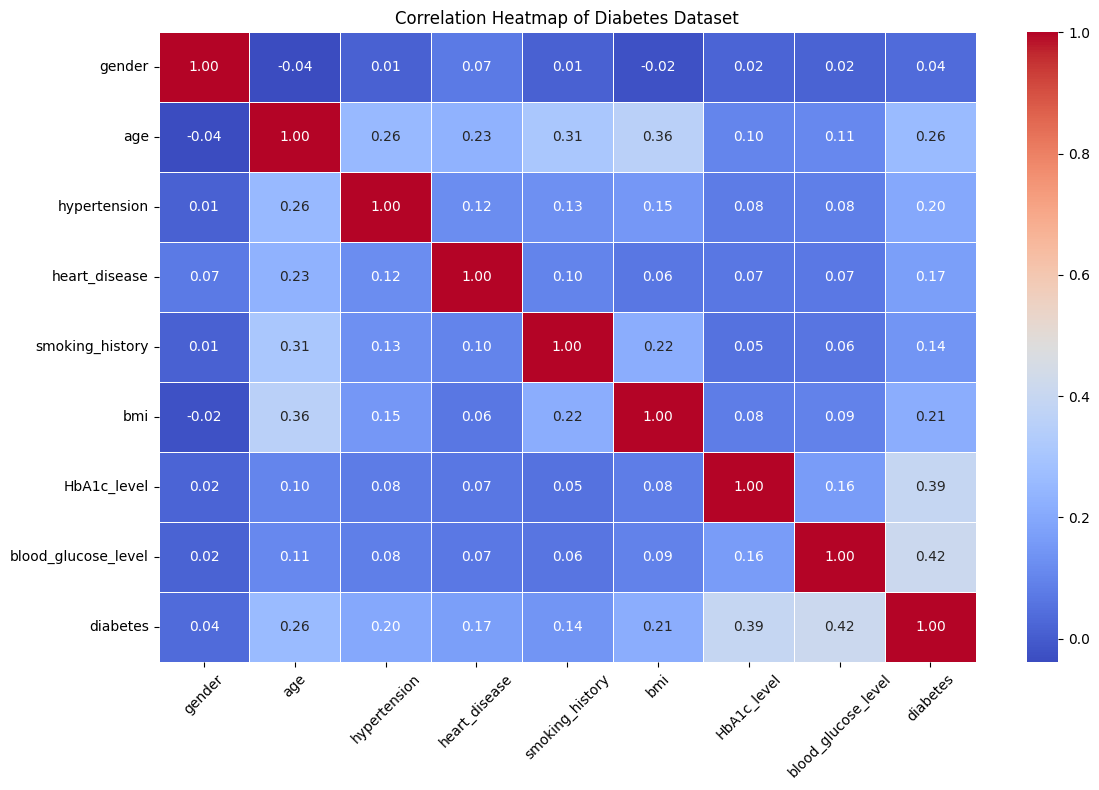

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [63]:
# === 5. MLflow Tracking Setup ===
mlflow.set_experiment("Your Dataset Classification")

with mlflow.start_run():

    # === 6. Train Model ===
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # === 7. Predictions ===
    y_pred = model.predict(X_test)

    # === 8. Evaluate Model ===
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # === 9. Log parameters and metrics ===
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    #  === 10. Log Model ===
    mlflow.sklearn.log_model(model, artifact_path="random_forest_classifier")

    # Print Run ID so you can use it later in other scripts
    print("Run ID:", mlflow.active_run().info.run_id)


2025/06/01 13:10:18 INFO mlflow.tracking.fluent: Experiment with name 'Your Dataset Classification' does not exist. Creating a new experiment.


Accuracy: 0.9720
Precision: 0.9414
Recall: 0.7012
F1 Score: 0.8038
Confusion Matrix:
[[16378    64]
 [  438  1028]]


2025/06/01 13:10:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 18ee43c57fb645ffb53444c0ef6a9c27


In [65]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']